In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
# 设置绘图风格和字体
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置中文字体为宋体，可根据需要更改为其他中文字体


In [211]:
data = pd.read_csv('ncp_result.csv')

In [212]:
data

,项目年度,作物名称,农产品Cd含量,Cd风险等级,综合风险等级,土壤pH值,土壤Cd含量
0,2019,玉米,0.05350,1,1,6.504135,0.501185
1,2019,水稻,0.01280,1,1,6.504135,0.524945
2,2019,玉米,0.00850,1,1,6.799940,0.421150
3,2019,玉米,0.05820,1,1,6.799940,0.421150
4,2019,玉米,0.03540,1,1,6.796547,0.422807
...,...,...,...,...,...,...,...
2891,2023,玉米,0.03080,1,1,5.940413,0.423768
2892,2023,玉米,0.13300,1,1,6.976614,0.858325
2893,2023,高粱,0.00301,1,2,6.290925,2.845345
2894,2023,水稻,0.01050,1,1,6.311817,1.392398


In [213]:
# 确认cd_level的分布情况
cd_level_distribution = data['综合风险等级'].value_counts()

# 基本描述性统计分析
descriptive_stats = data.describe()

cd_level_distribution, descriptive_stats

(1    2315
 3     322
 2     259
 Name: 综合风险等级, dtype: int64,
               项目年度      农产品Cd含量       Cd风险等级       综合风险等级        土壤pH值  \
 count  2896.000000  2896.000000  2896.000000  2896.000000  2896.000000   
 mean   2021.315953     0.085675     1.284185     1.311809     6.364868   
 std       1.474469     0.141226     0.643049     0.661144     0.621894   
 min    2019.000000     0.000000     1.000000     1.000000     4.736517   
 25%    2020.000000     0.012400     1.000000     1.000000     5.930024   
 50%    2022.000000     0.033850     1.000000     1.000000     6.338800   
 75%    2023.000000     0.088000     1.000000     1.000000     6.796192   
 max    2023.000000     1.730000     3.000000     3.000000     7.622313   
 
             土壤Cd含量  
 count  2896.000000  
 mean      0.998879  
 std       0.564855  
 min       0.325463  
 25%       0.583619  
 50%       0.922742  
 75%       1.168864  
 max       3.890228  )

从结果来看，综合风险等级字段中大部分数据为1，2和3的数量分别较少。接下来分析土壤pH值、Cd含量与农产品超标率之间的整体关系。

# 箱线图分析

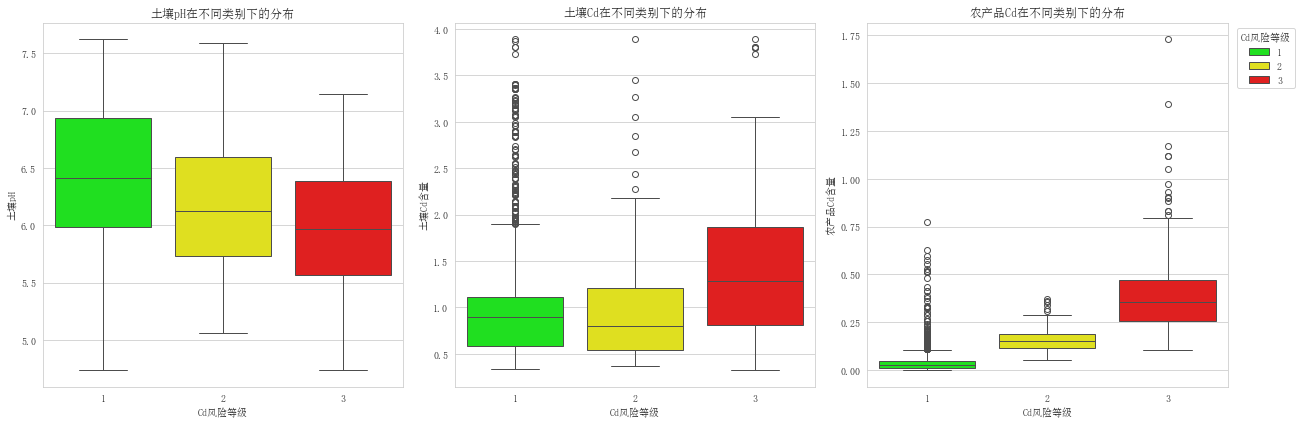

In [214]:

# 自定义颜色映射
colors = ['#00FF00','#FFFF00','#FF0000']  # 绿、黄、红
# 创建一个颜色调色板
palette = sns.color_palette(colors)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cd风险等级', y='土壤pH值', hue='Cd风险等级', data=data, palette=palette)
plt.title('土壤pH在不同类别下的分布')
plt.xlabel('Cd风险等级')
plt.ylabel('土壤pH')
plt.legend(title = 'Cd风险等级',loc='upper right', bbox_to_anchor=(1.25, 1))  
plt.legend().remove()  # 移除第一幅图的图例
plt.subplot(1, 3, 2)
sns.boxplot(x='Cd风险等级', y='土壤Cd含量', hue='Cd风险等级', data=data, palette=palette)
plt.title('土壤Cd在不同类别下的分布')
plt.xlabel('Cd风险等级')
plt.ylabel('土壤Cd含量')
plt.legend(title = 'Cd风险等级',loc='upper right', bbox_to_anchor=(1.25, 1)) 
plt.legend().remove()  # 移除第一幅图的图例

plt.subplot(1, 3, 3)
sns.boxplot(x='Cd风险等级', y='农产品Cd含量', hue='Cd风险等级', data=data, palette=palette)
plt.title('农产品Cd在不同类别下的分布')
plt.xlabel('Cd风险等级')
plt.ylabel('农产品Cd含量')
plt.legend(title = 'Cd风险等级',loc='upper right', bbox_to_anchor=(1.2, 1)) 

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1296x432 with 0 Axes>

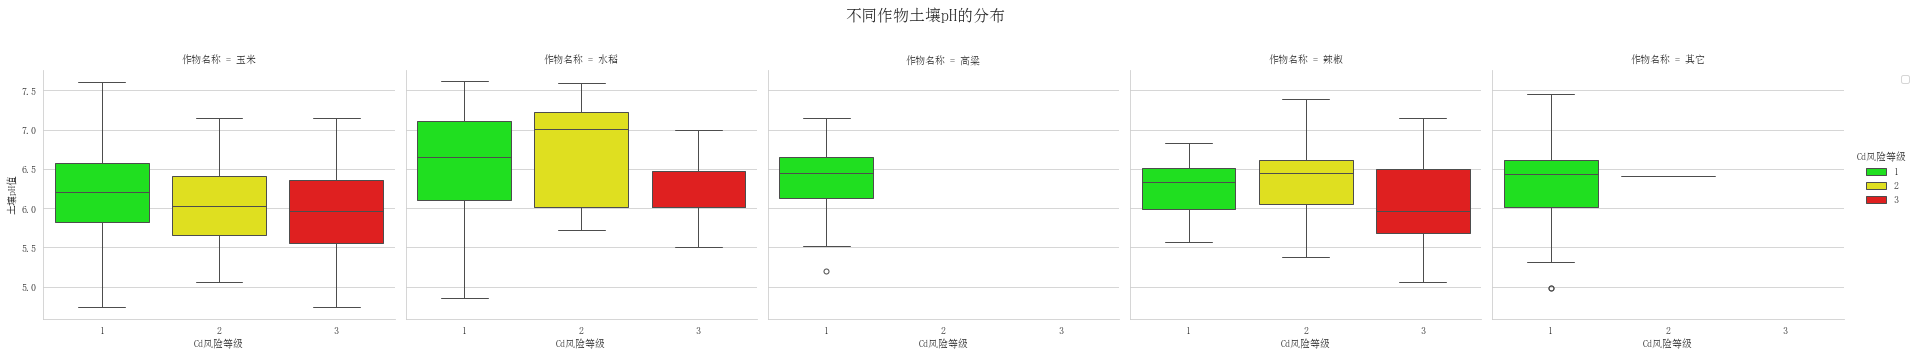

In [215]:
plt.figure(figsize=(18, 6))

# 使用 sns.catplot() 创建分面箱线图
sns.catplot(
    data=data, 
    x='Cd风险等级', 
    y='土壤pH值', 
    hue='Cd风险等级', 
    col='作物名称',  # 按作物名称分面
    kind='box',  # 箱线图类型
    palette=palette,
)

# 设置整体标题
plt.suptitle('不同作物土壤pH的分布', fontsize=16)
# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1296x432 with 0 Axes>

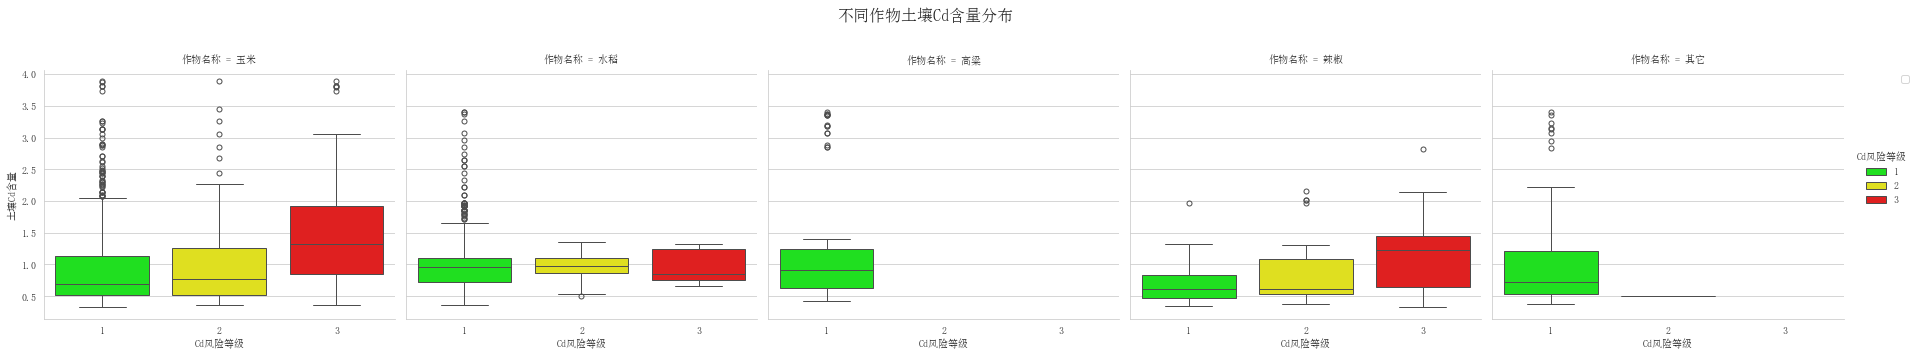

In [216]:
plt.figure(figsize=(18, 6))

# 使用 sns.catplot() 创建分面箱线图
sns.catplot(
    data=data, 
    x='Cd风险等级', 
    y='土壤Cd含量', 
    hue='Cd风险等级', 
    col='作物名称',  # 按作物名称分面
    kind='box',  # 箱线图类型
    palette=palette,
)

# 设置整体标题
plt.suptitle('不同作物土壤Cd含量分布', fontsize=16)
# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])
# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()


土壤pH值越低，Cd超标风险越大，

# 联合散点图分析

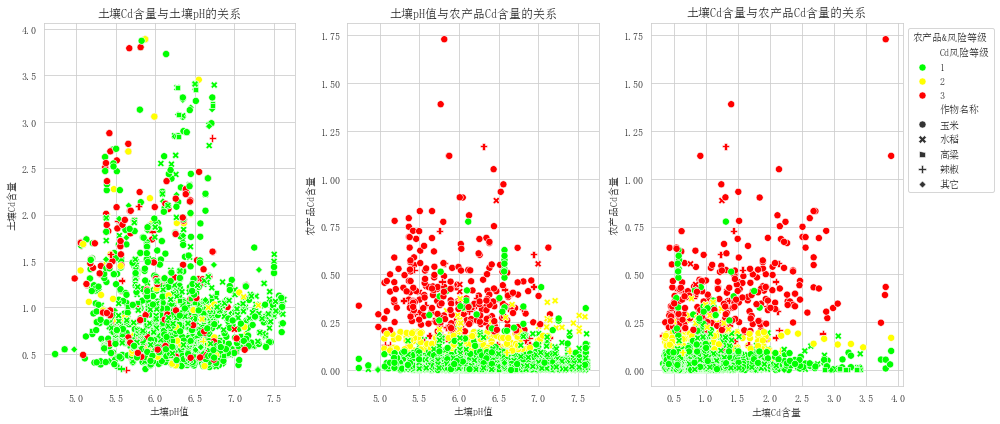

In [217]:


# 分析土壤pH值与土壤Cd含量的关系
plt.figure(figsize=(14, 6))

# 分析土壤pH值与土壤Cd含量的关系
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='土壤pH值', y='土壤Cd含量', hue='Cd风险等级', style='作物名称', palette=palette, s=50)
plt.title('土壤Cd含量与土壤pH的关系')
plt.xlabel('土壤pH值')
plt.ylabel('土壤Cd含量')
plt.legend().remove()  # 移除第一幅图的图例

# 分析土壤pH值与农产品Cd含量的关系
plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='土壤pH值', y='农产品Cd含量', hue='Cd风险等级', style='作物名称', palette=palette, s=50)
plt.title('土壤pH值与农产品Cd含量的关系')
plt.xlabel('土壤pH值')
plt.ylabel('农产品Cd含量')
plt.legend().remove()  # 移除第二幅图的图例

# 分析土壤Cd含量与农产品Cd含量的关系
plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='土壤Cd含量', y='农产品Cd含量', hue='Cd风险等级', style='作物名称', palette=palette, s=50)
plt.title('土壤Cd含量与农产品Cd含量的关系')
plt.xlabel('土壤Cd含量')
plt.ylabel('农产品Cd含量')

# 创建独立的图例
legend = plt.legend(title='农产品&风险等级')
legend.set_bbox_to_anchor((1, 1))  # 调整图例位置

plt.tight_layout()
plt.show()


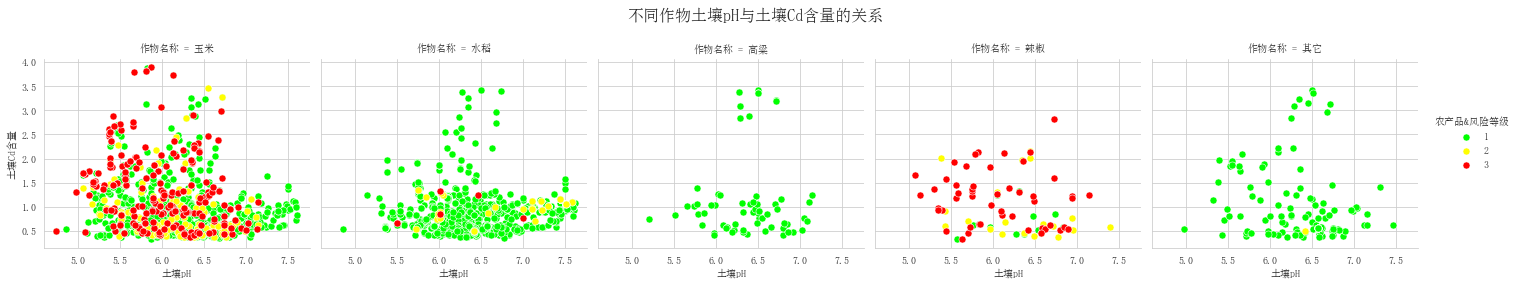

In [218]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(data, col="作物名称", hue='Cd风险等级', palette=palette, col_wrap=5, height=4)

# 绘制散点图
g.map(sns.scatterplot, '土壤pH值', '土壤Cd含量', s=50)

# 设置坐标轴标签
g.set_axis_labels("土壤pH", "土壤Cd含量")

# 添加图例
g.add_legend(title='农产品&风险等级')

# 调整图形上边距
plt.subplots_adjust(top=0.8)

# 添加图形标题
g.fig.suptitle('不同作物土壤pH与土壤Cd含量的关系', fontsize=16)

# 显示图形
plt.show()


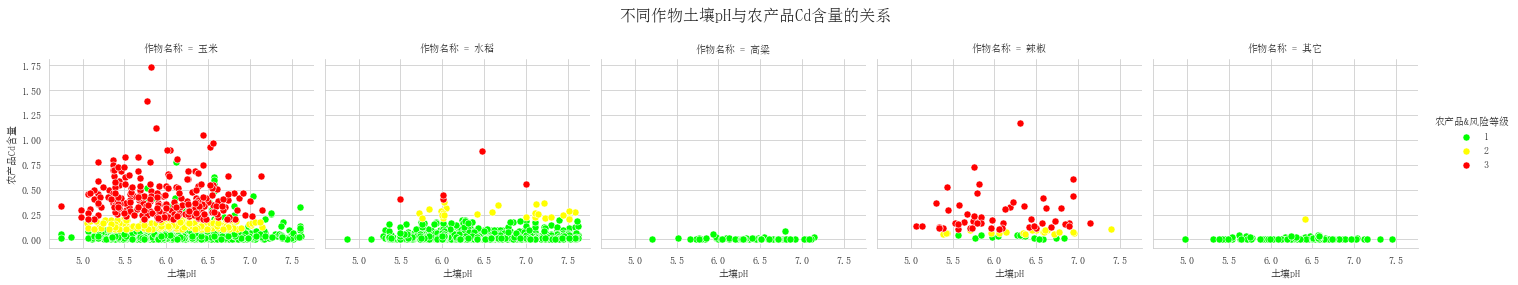

In [219]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(data, col="作物名称", hue='Cd风险等级', palette=palette, col_wrap=5, height=4)

# 绘制散点图
g.map(sns.scatterplot, '土壤pH值', '农产品Cd含量', s=50)

# 设置坐标轴标签
g.set_axis_labels("土壤pH", "农产品Cd含量")

# 添加图例
g.add_legend(title='农产品&风险等级')

# 调整图形上边距
plt.subplots_adjust(top=0.8)

# 添加图形标题
g.fig.suptitle('不同作物土壤pH与农产品Cd含量的关系', fontsize=16)

# 显示图形
plt.show()


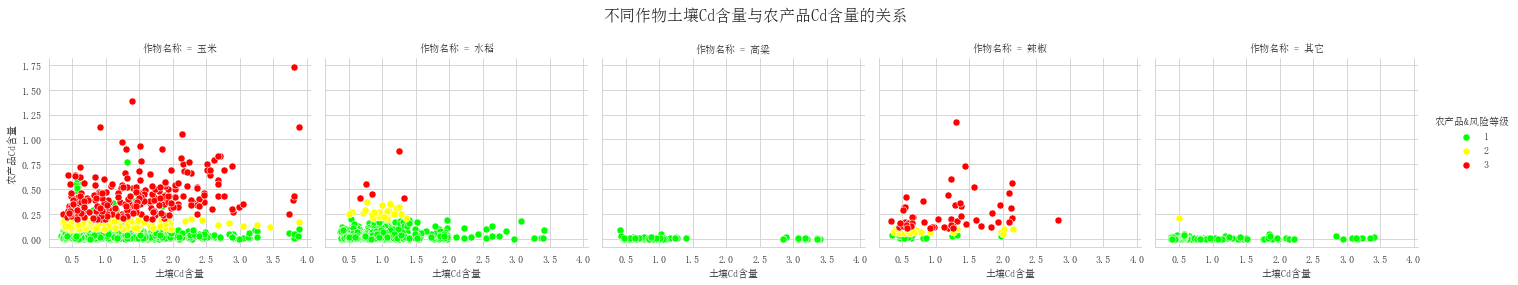

In [220]:
# 创建一个FacetGrid对象
g = sns.FacetGrid(data, col="作物名称", hue='Cd风险等级', palette=palette, col_wrap=5, height=4)

# 绘制散点图
g.map(sns.scatterplot, '土壤Cd含量', '农产品Cd含量', s=50)

# 设置坐标轴标签
g.set_axis_labels("土壤Cd含量", "农产品Cd含量")

# 添加图例
g.add_legend(title='农产品&风险等级')

# 调整图形上边距
plt.subplots_adjust(top=0.8)

# 添加图形标题
g.fig.suptitle('不同作物土壤Cd含量与农产品Cd含量的关系', fontsize=16)

# 显示图形
plt.show()


# 分年度分析

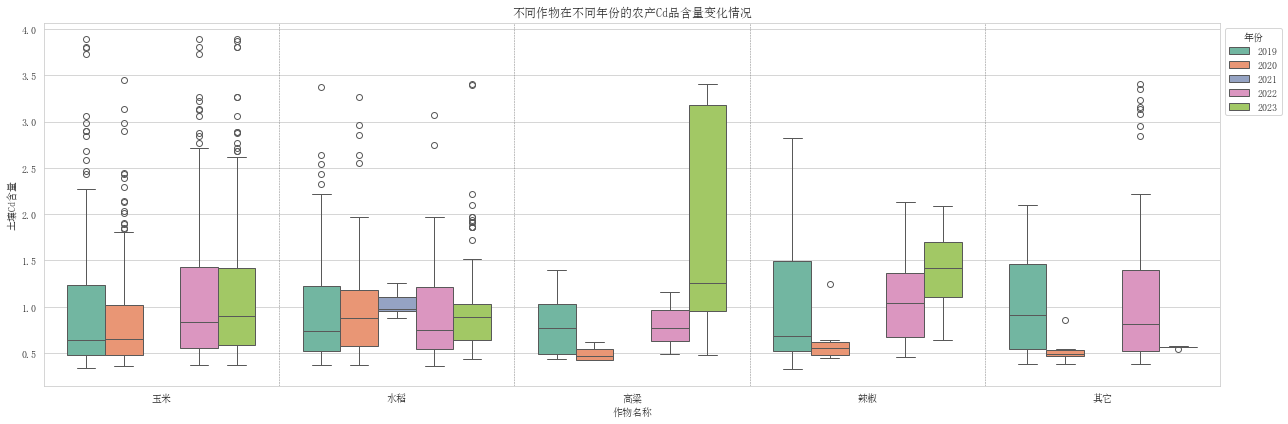

In [221]:
# 分析不同作物在不同年份的土壤Cd品含量变化情况
plt.figure(figsize=(18, 6))

# 使用 sns.boxplot() 绘制箱线图
sns.boxplot(data=data, x='作物名称', y='土壤Cd含量', hue='项目年度', palette='Set2')
plt.title('不同作物在不同年份的农产Cd品含量变化情况')
plt.xlabel('作物名称')
plt.ylabel('土壤Cd含量')
plt.legend(title='年份', bbox_to_anchor=(1, 1), loc='upper left')

# 添加分割线
for i in range(1, len(data['作物名称'].unique())):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


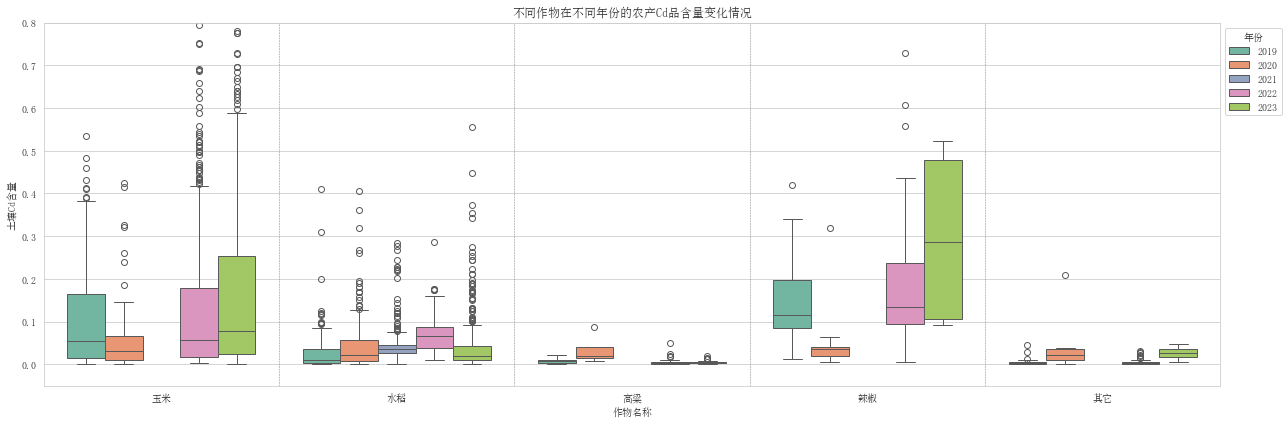

In [222]:
# 分析不同作物在不同年份的农产Cd品含量变化情况
plt.figure(figsize=(18, 6))

# 使用 sns.boxplot() 绘制箱线图
sns.boxplot(data=data, x='作物名称', y='农产品Cd含量', hue='项目年度', palette='Set2')
plt.title('不同作物在不同年份的农产Cd品含量变化情况')
plt.xlabel('作物名称')
plt.ylabel('土壤Cd含量')
plt.legend(title='年份', bbox_to_anchor=(1, 1), loc='upper left')

# 添加分割线
for i in range(1, len(data['作物名称'].unique())):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=0.5)

# 调整显示范围
plt.ylim(-0.05,0.8)
plt.tight_layout()
plt.show()


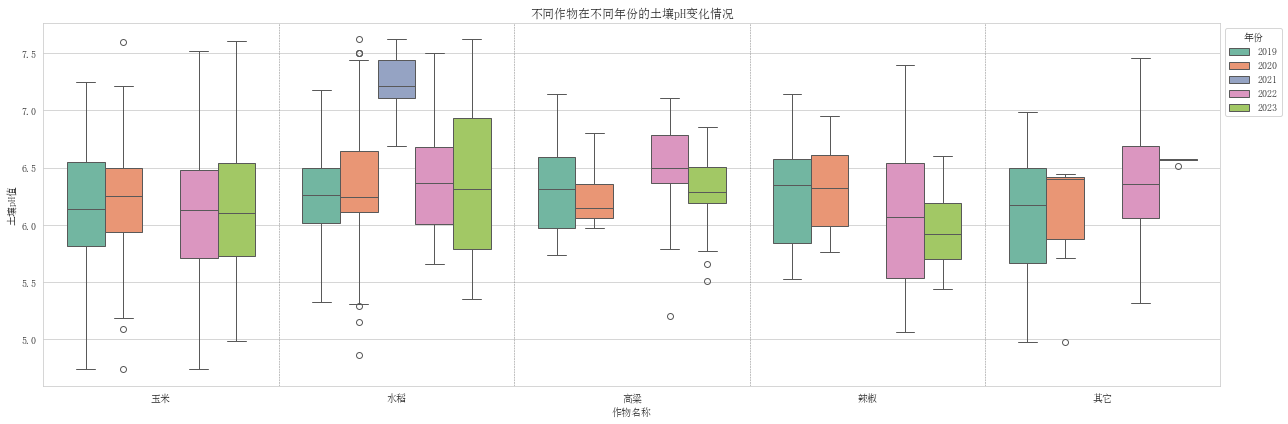

In [223]:
# 分析不同作物在不同年份的土壤pH品含量变化情况
plt.figure(figsize=(18, 6))

# 使用 sns.boxplot() 绘制箱线图
sns.boxplot(data=data, x='作物名称', y='土壤pH值', hue='项目年度', palette='Set2')
plt.title('不同作物在不同年份的土壤pH变化情况')
plt.xlabel('作物名称')
plt.ylabel('土壤pH值')
plt.legend(title='年份', bbox_to_anchor=(1, 1), loc='upper left')

# 添加分割线
for i in range(1, len(data['作物名称'].unique())):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


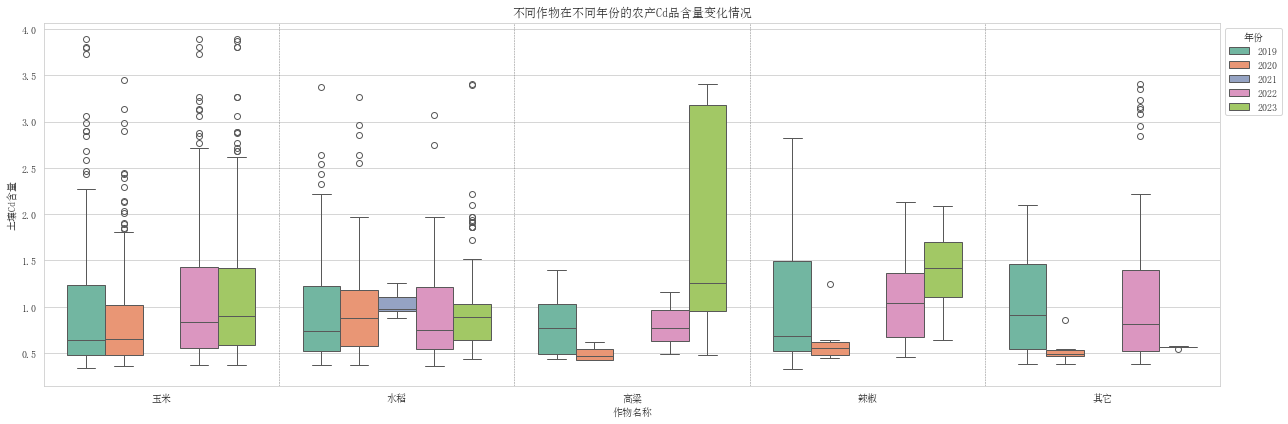

In [224]:


plt.figure(figsize=(18, 6))

# 使用 sns.boxplot() 绘制箱线图
sns.boxplot(data=data, x='作物名称', y='土壤Cd含量', hue='项目年度', palette='Set2')
plt.title('不同作物在不同年份的农产Cd品含量变化情况')
plt.xlabel('作物名称')
plt.ylabel('土壤Cd含量')
plt.legend(title='年份', bbox_to_anchor=(1, 1), loc='upper left')

# 添加分割线
for i in range(1, len(data['作物名称'].unique())):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


# 年度趋势

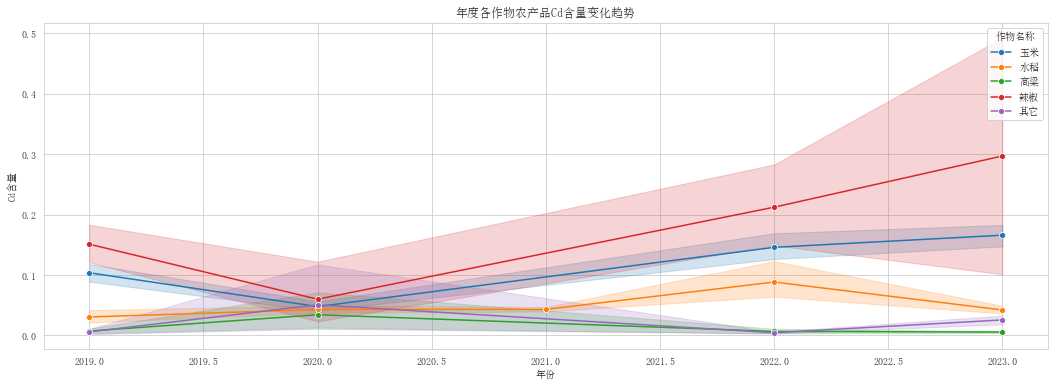

In [225]:


# 设置图形大小
plt.figure(figsize=(18, 6))

# 绘制折线图
sns.lineplot(x='项目年度', y='农产品Cd含量', hue='作物名称', data=data, marker='o')

# 设置标题和标签
plt.title('年度各作物农产品Cd含量变化趋势')
plt.xlabel('年份')
plt.ylabel('Cd含量')

# 添加图例并设置标题
plt.legend(title='作物名称')

# 显示图形
plt.show()


<Figure size 1296x720 with 0 Axes>

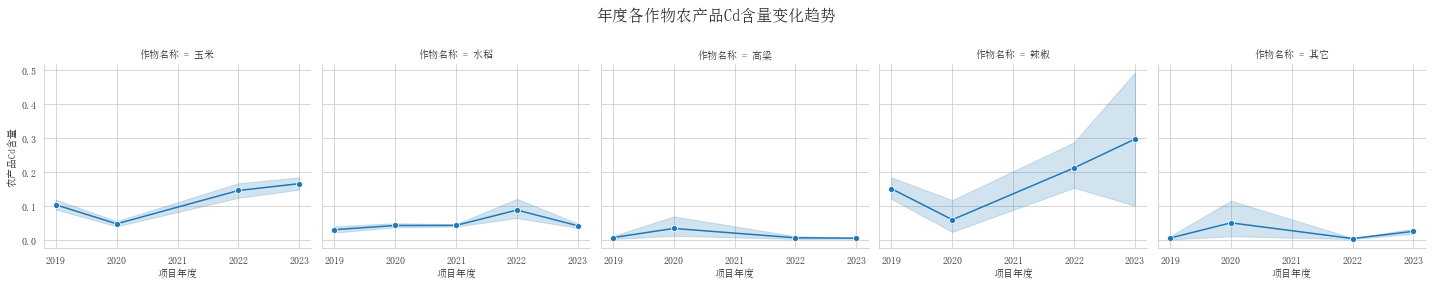

In [226]:
# 设置图形大小
plt.figure(figsize=(18, 10))

# 创建 FacetGrid 对象
g = sns.FacetGrid(data, col='作物名称', col_wrap=5, height=4)

# 使用 lineplot() 绘制每个子图
g.map(sns.lineplot, '项目年度', '农产品Cd含量', marker='o')

# 设置标题
g.fig.suptitle('年度各作物农产品Cd含量变化趋势', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<Figure size 1296x720 with 0 Axes>

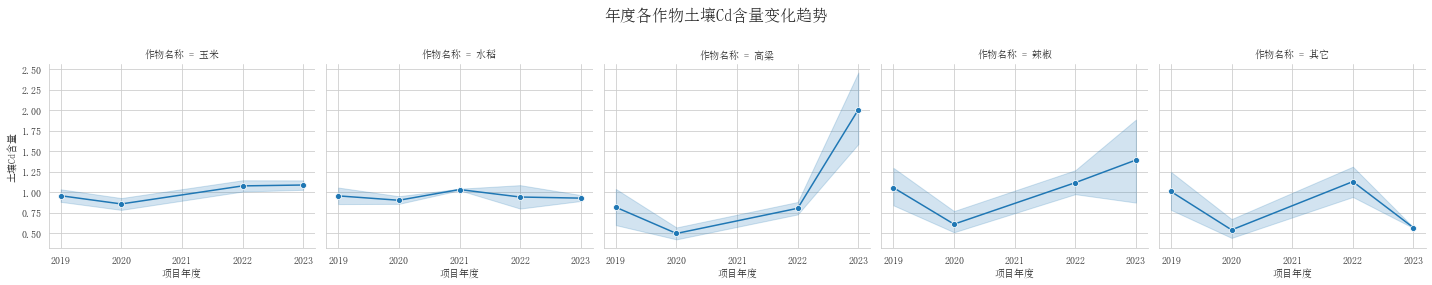

In [227]:
# 设置图形大小
plt.figure(figsize=(18, 10))

# 创建 FacetGrid 对象
g = sns.FacetGrid(data, col='作物名称', col_wrap=5, height=4)

# 使用 lineplot() 绘制每个子图
g.map(sns.lineplot, '项目年度', '土壤Cd含量', marker='o')

# 设置标题
g.fig.suptitle('年度各作物土壤Cd含量变化趋势', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 分析超标数据

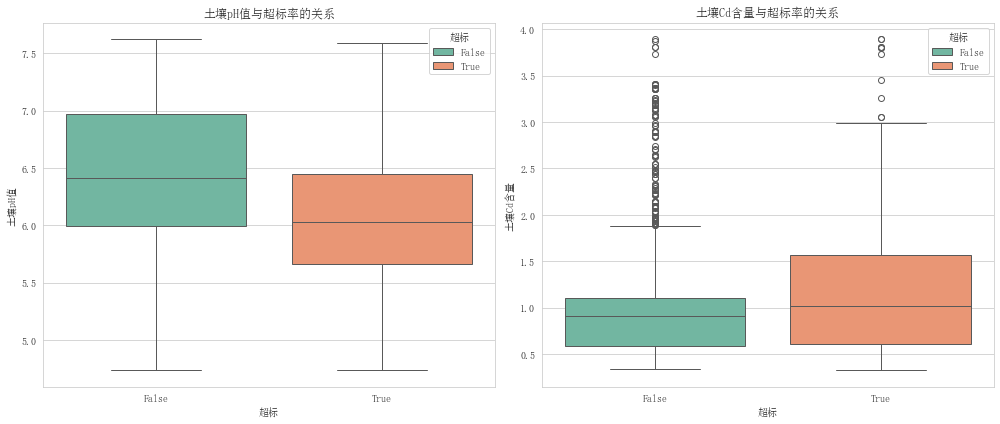

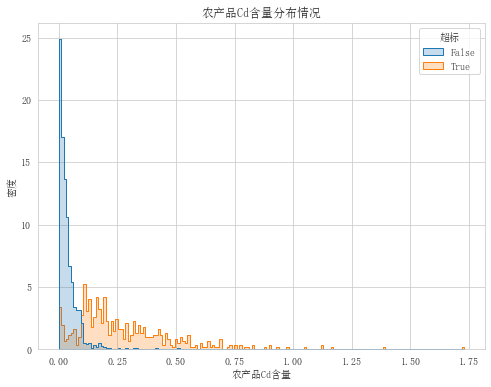

In [228]:
# 准备数据：标记超标的数据
data['超标'] = data['综合风险等级'] > 1

# 土壤pH与超标率的关系
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='超标', y='土壤pH值', hue="超标", data=data,palette='Set2')
plt.title('土壤pH值与超标率的关系')

# 土壤Cd含量与超标率的关系
plt.subplot(1, 2, 2)
sns.boxplot(x='超标', y='土壤Cd含量', hue="超标", data=data,palette='Set2')
plt.title('土壤Cd含量与超标率的关系')

plt.tight_layout()
plt.show()

# 作物Cd含量的分布情况
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="农产品Cd含量", hue="超标", element="step", stat="density", common_norm=False)
plt.title('农产品Cd含量分布情况')
plt.xlabel('农产品Cd含量')
plt.ylabel('密度')
plt.show()


- 1、土壤pH与Cd超标率的关系：箱线图展示了不同超标状态下的土壤pH分布。可以看出，超标与未超标作物的土壤pH分布在一定程度上存在差异，这暗示土壤pH可能会影响作物的Cd含量。
- 2、土壤Cd含量与Cd超标率的关系：箱线图展示了不同超标状态下的土壤Cd含量分布。从图中可以明显看出，超标作物的土壤Cd含量普遍高于未超标作物的土壤Cd含量，这表明土壤Cd含量是影响作物Cd超标的一个重要因素。
- 3、作物Cd含量的分布情况：直方图展示了超标与未超标作物的Cd含量分布范围。

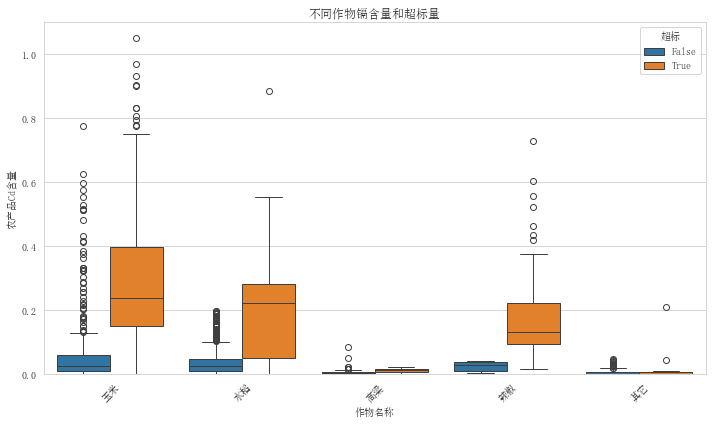

,作物名称,超标
3,辣椒,0.866667
2,玉米,0.317656
0,其它,0.092437
1,水稻,0.041262
4,高粱,0.028986


In [229]:
# 不同作物的Cd含量与超标率
plt.figure(figsize=(10, 6))
sns.boxplot(x='作物名称', y='农产品Cd含量', hue='超标', data=data)
plt.title('不同作物镉含量和超标量')
plt.xlabel('作物名称')
plt.ylabel('农产品Cd含量')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更清晰地显示
plt.ylim(0,1.1)
plt.tight_layout()
plt.show()

# 对每种作物进行超标率的计算
exceedance_rate_by_crop = data.groupby('作物名称')['超标'].mean().reset_index().sort_values(by='超标', ascending=False)

exceedance_rate_by_crop


#### 不同作物的Cd含量和超标率
超标率：辣椒的超标率最高，达到了86%，显示辣椒在所有作物中受Cd污染的风险最高。而玉米的超标率则为31%，相对较低。其它作物的超标率要么为0，要么非常低，这表明它们相对于辣椒、玉米，对Cd的吸收能力较低，或者种植在Cd含量较低的土壤中。

辣椒和玉米在受Cd污染的风险上显著高于其他作物，特别是辣椒，需要特别注意其种植环境的重金属污染水平。


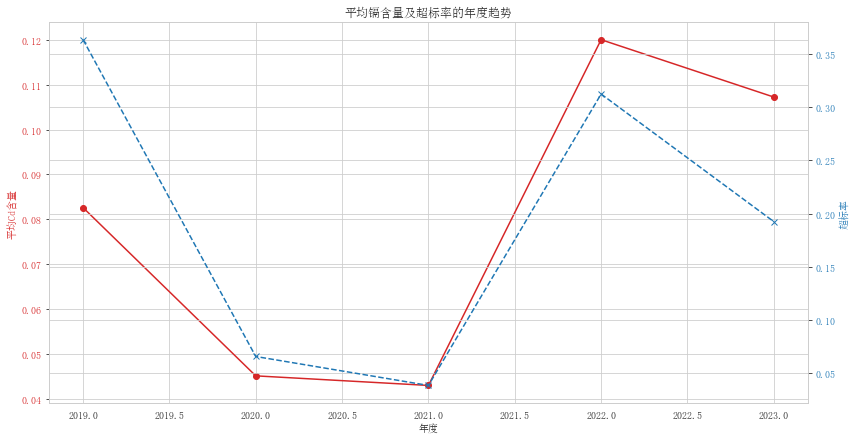

In [230]:
# 设置时间序列索引
data['项目年度'] = pd.to_datetime(data['项目年度'], format='%Y')
data.set_index('项目年度', inplace=True)

# 年度平均Cd含量和超标率
annual_cd_mean = data['农产品Cd含量'].resample('A').mean()
annual_exceedance_rate = data['超标'].resample('A').mean()

# 绘制时间序列趋势图
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('年度')
ax1.set_ylabel('平均Cd含量', color=color)
ax1.plot(annual_cd_mean.index.year, annual_cd_mean, color=color, marker='o', label='平均Cd含量')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # 实例化一个双y轴
color = 'tab:blue'
ax2.set_ylabel('超标率', color=color)
ax2.plot(annual_exceedance_rate.index.year, annual_exceedance_rate, color=color, marker='x', linestyle='--', label='超标率')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # 为了避免重叠
plt.title('平均镉含量及超标率的年度趋势')
plt.show()


#### 不同年份的Cd超标率和平均含量
- 1、超标率：从2019年到2021年，作物Cd的超标率整体呈现下降趋势，但在2022年有显著上升，之后在2023年又有所下降。这可能反映了不同年份间农业管理措施、环境政策的变化，或者自然环境条件（如土壤Cd含量）的波动。
- 2、平均Cd含量：平均Cd含量的趋势与超标率类似，2019年较高，之后逐年下降，直到2022年再次显著上升，2023年略有下降。这个趋势进一步支持了超标率变化的观察结果。
超标情况和作物Cd含量受多种因素影响，包括可能的环境变化、农业实践和监管政策。特别是2022年的显著上升需要进一步研究原因，以便采取针对性的改进措施。

分析结果显示，土壤Cd含量与作物Cd含量之间存在正相关（相关系数约为0.26）。这表明随着土壤Cd含量的增加，作物Cd含量也倾向于增加，尽管这种关联性是中等程度的。这一发现支持了土壤Cd污染水平是影响作物Cd含量的重要因素的观点。

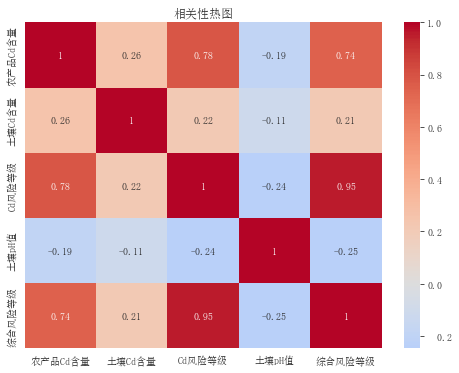

In [231]:
import warnings
# 禁用特定类型的警告
warnings.filterwarnings("ignore", category=UserWarning, message="Glyph 8722")


# 分析土壤Cd含量、农产品Cd含量、土壤pH、Cd风险等级和综合风险等级之间的相关性
soil_ph_cd_correlation = data[['农产品Cd含量','土壤Cd含量', 'Cd风险等级','土壤pH值','综合风险等级']].corr()
# 绘制相关性热图
plt.figure(figsize=(8, 6))
sns.heatmap(soil_ph_cd_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('相关性热图')
plt.show()

大于0表示正相关，小于0表示负相关。

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


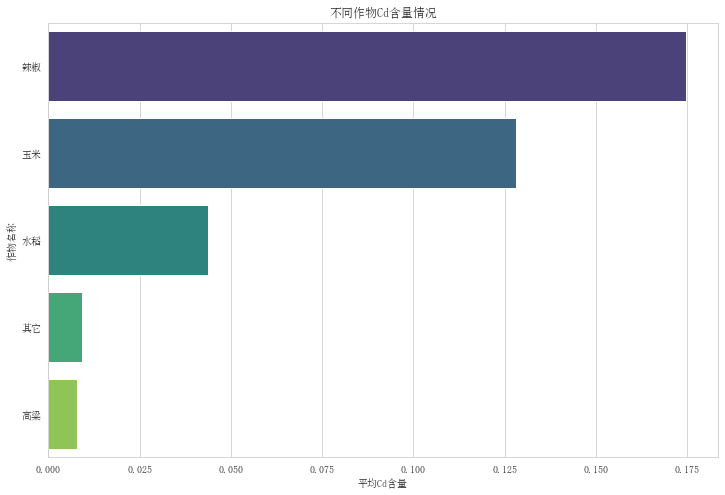

,作物名称,农产品Cd含量
3,辣椒,0.174606
2,玉米,0.127949
1,水稻,0.043637
0,其它,0.009257
4,高粱,0.007765


In [232]:
# 分析不同作物对Cd的吸收能力
# 计算每种作物的平均Cd含量
average_cd_by = data.groupby('作物名称')['农产品Cd含量'].mean()
average_cd_by_crop = average_cd_by.reset_index()
average_cd_by_crop_sorted = average_cd_by_crop.sort_values(by='农产品Cd含量', ascending=False)

# 绘制不同作物的平均Cd含量条形图
plt.figure(figsize=(12, 8))
sns.barplot(x='农产品Cd含量', y='作物名称', data=average_cd_by_crop_sorted, hue='作物名称', palette='viridis', dodge=False)
plt.title('不同作物Cd含量情况')
plt.xlabel('平均Cd含量')
plt.ylabel('作物名称')
plt.legend().remove()  # 移除图例
plt.show()
average_cd_by_crop_sorted


根据分析结果，不同作物对Cd的吸收能力存在显著差异：

- 1、辣椒表现出最高的平均Cd含量（约0.175），表明其对Cd的吸收能力强于其他作物。
- 2、玉米和水稻也显示出相对较高的Cd含量（约0.128和0.043），指示这些作物在面对土壤Cd污染时也容易积累较高水平的Cd。
- 3、相比之下，搞联合其它作物的Cd含量相对较低，表明它们对Cd的吸收能力较弱。

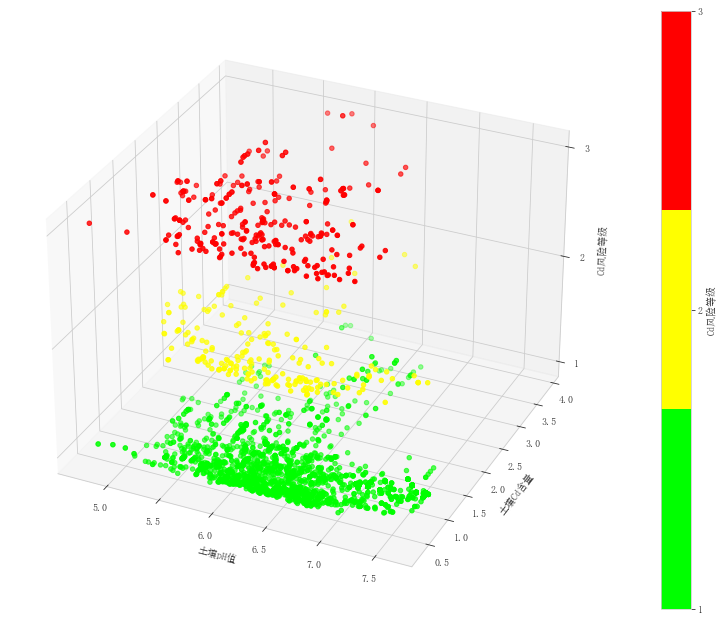

In [233]:


# 自定义颜色映射
colors = ['#00FF00','#FFFF00','#FF0000']  # 绿、黄、红
cmap = mcolors.ListedColormap(colors)

# 创建一个新的图形和一个3D坐标系
fig = plt.figure(figsize=(20, 11))
ax = fig.add_subplot(111, projection='3d')

# 根据 cd_level 设置散点颜色
scatter = ax.scatter(data['土壤pH值'], data['土壤Cd含量'], data['Cd风险等级'], c=data['Cd风险等级'], cmap=cmap)

# 设置颜色条
cbar = fig.colorbar(scatter)
cbar.set_label('Cd风险等级')
cbar.set_ticks([1, 2, 3])  # 设置颜色条刻度
cbar.set_ticklabels(['1', '2', '3'])  # 设置颜色条标签

# 设置 Z 坐标刻度和标签
ax.set_zticks([1, 2, 3])  # 设置 Z 坐标刻度
ax.set_zticklabels(['1', '2', '3'])  # 设置 Z 坐标标签

# 设置坐标轴标签和标题
ax.set_xlabel('土壤pH值')
ax.set_ylabel('土壤Cd含量')
ax.set_zlabel('Cd风险等级')

# 设置观察角度
ax.view_init(azim=295, elev=30)

plt.show()
